## импортируем необходимое

In [1]:
%pip install seaborn

In [2]:

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
import seaborn as sns

<ipython-input-2-b8c3c56334ea>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Разделение на объекты и классы

In [3]:
mushrooms = pd.read_csv("mushroom_dataset.csv")

X = mushrooms.loc[:, mushrooms.columns != "mushroom"]
y = mushrooms["mushroom"]

print("The dataset contains {} rows and {} columns. \n".format(mushrooms.shape[0], mushrooms.shape[1]))
print("Number of unique labels for each category: \n")
print(mushrooms.nunique().sort_values(ascending=False))
print()

class_counts = mushrooms["mushroom"].value_counts()
class_counts.index = ["edible", "poisonous"]

print("Percentage of each class:")
print(class_counts/mushrooms.shape[0] * 100)
mushrooms.head()

The dataset contains 8416 rows and 23 columns. 

Number of unique labels for each category: 

gill-color                  12
cap-color                   10
stalk-color-above-ring       9
odor                         9
spore-print-color            9
stalk-color-below-ring       9
habitat                      7
cap-shape                    6
population                   6
ring-type                    5
stalk-root                   5
veil-color                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
cap-surface                  4
ring-number                  3
stalk-shape                  2
gill-size                    2
gill-spacing                 2
gill-attachment              2
bruises                      2
mushroom                     2
veil-type                    1
dtype: int64

Percentage of each class:
edible       53.326996
poisonous    46.673004
Name: count, dtype: float64


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


### Заменяем символ вопроса

In [4]:
mushrooms_na = mushrooms.replace("?", np.nan)

### Находим сколько nan значений

In [5]:
narows = mushrooms_na[mushrooms_na.isnull().any(axis=1)]
nacols = mushrooms_na.columns[mushrooms_na.isna().any()].tolist()

percent_narows = round(len(narows)/mushrooms_na.shape[0]*100, 1)
percent_nacols = round(len(nacols)/mushrooms_na.shape[1]*100, 1)

print("There are {} row(s) ({}%) with NaN values.".format(len(narows), percent_narows))
print("There are {} column(s) ({}%) with NaN values.".format(len(nacols), percent_nacols))

There are 2480 row(s) (29.5%) with NaN values.
There are 1 column(s) (4.3%) with NaN values.


### Получаем значимые поля

In [6]:
alpha = 0.05

for col in X.columns.values:

    A, B = mushrooms[col], mushrooms["mushroom"]

    dfObserved = pd.crosstab(A, B) 
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)

    if p < alpha:
        print("{} is important. (p = {})".format(col, p))
    else:
        print("{} is NOT important. (p = {})".format(col, p))

cap-shape is important. (p = 3.1872101369079138e-103)
cap-surface is important. (p = 5.996665311451181e-76)
cap-color is important. (p = 1.168725557952354e-90)
bruises is important. (p = 0.0)
odor is important. (p = 0.0)
gill-attachment is important. (p = 5.401072537082819e-26)
gill-spacing is important. (p = 4.427956604575953e-271)
gill-size is important. (p = 0.0)
gill-color is important. (p = 0.0)
stalk-shape is important. (p = 3.161053430635312e-29)
stalk-root is important. (p = 0.0)
stalk-surface-above-ring is important. (p = 0.0)
stalk-surface-below-ring is important. (p = 0.0)
stalk-color-above-ring is important. (p = 0.0)
stalk-color-below-ring is important. (p = 0.0)
veil-type is NOT important. (p = 1.0)
veil-color is important. (p = 6.08853380951878e-39)
ring-number is important. (p = 2.630474984415953e-79)
ring-type is important. (p = 0.0)
spore-print-color is important. (p = 0.0)
population is important. (p = 0.0)
habitat is important. (p = 0.0)


### одно поле можно дропнуть

In [7]:
mushrooms = mushrooms.drop(["veil-type"], axis=1)
X = X.drop(["veil-type"], axis=1)

### Получаем Corr для комбинации полей

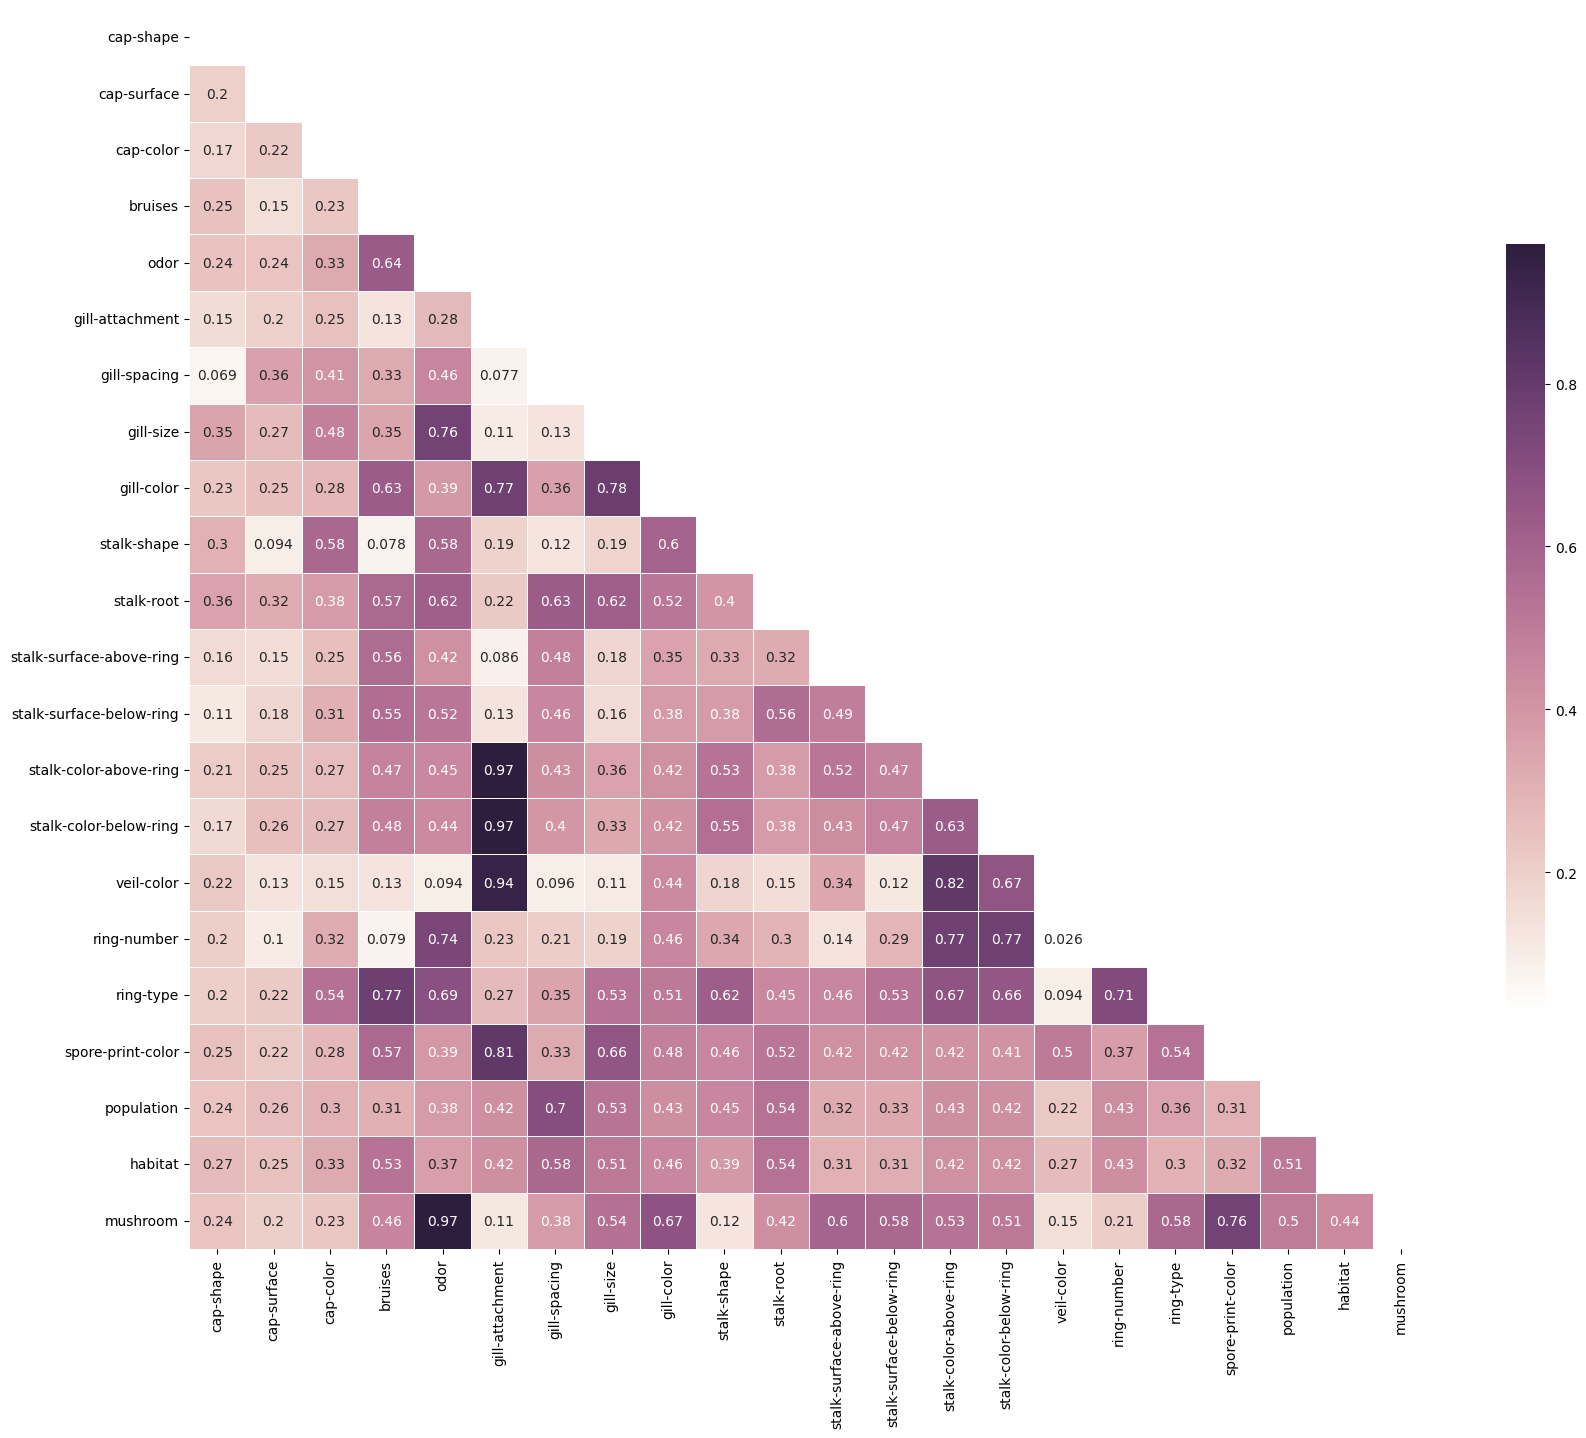

In [8]:
import itertools

def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(mushrooms.columns.values)
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):

    A, B = mushrooms[col1], mushrooms[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

def labelencode(df):
    """
    Performs a label encoding of a dataframe
    
    Args:
        df: Dataframe to be encoded
        
    Returns:
        Label encoded dataframe
    """
    le = LabelEncoder()
    return df.apply(le.fit_transform)

def onehotencode(df):
    """
    Performs one-hot encoding of a dataframe
    
    Args:
        df: Dataframe to be encoded
        
    Returns:
        One-hot encoded labels   
    """
    enc = OneHotEncoder()
    enc.fit(df)

    return enc.transform(df).toarray()

def labelbinarise(df):
    """
    Performs label binarisation of a dataframe
    
    Args:
        df: Dataframe to be binarised
        
    Returns:
        Binarised labels 
    """
    lb = LabelBinarizer()
    
    return lb.fit_transform(df)

X_2 = labelencode(X)
onehotlabels = onehotencode(X_2)
y_2 = labelbinarise(y)

X_2.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,8,0,0,1,1,1,10,1,...,3,3,7,7,2,1,4,6,4,6
1,2,3,8,0,0,1,1,1,10,1,...,3,3,7,7,2,1,4,1,4,6
2,2,3,8,0,0,1,1,1,7,1,...,3,3,7,7,2,1,4,6,4,6
3,2,3,8,0,0,1,1,1,7,1,...,3,3,7,7,2,1,4,1,4,6
4,2,3,8,0,0,1,1,1,1,1,...,3,3,7,7,2,1,4,6,4,6


### Глянем график

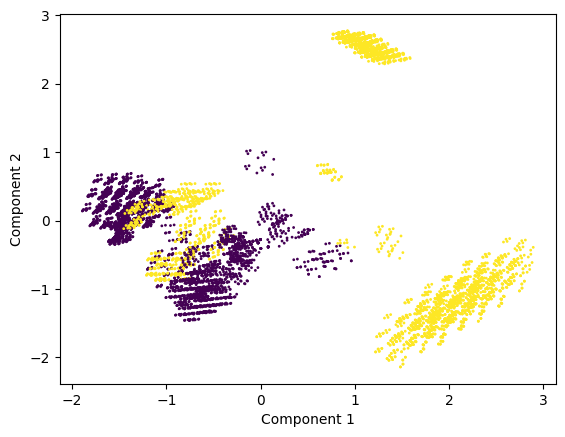

In [10]:
pca = PCA(n_components=2)

projected = pca.fit_transform(onehotlabels)

plt.scatter(projected[:, 0], projected[:, 1], c=y_2.ravel(), s=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [52]:
from sklearn.metrics import __all__
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, ShuffleSplit

In [53]:


def calculate_cv(clf, X, y):
    """
    Performs cross validation on a model
    
    Args: 
        clf: The classifier to cross validate
        
    Returns:
        scores: Cross validation scores
    """
    
    # Define a function to calculate null accuracy
    def null_accuracy(ytrue, ypred): return 1-ytrue.mean()
    # Define a function to calculate the positive proportion of each set
    def pos_prop(ytrue, ypred): return ytrue.sum()/ytrue.shape[0] * 100
    
    # Define our scoring metrics
    scoring = {"precision": "precision", 
               "recall": "recall", 
               "accuracy": "accuracy", 
               "f1": "f1",
               "pos_prop": make_scorer(pos_prop),
               "null_accuracy": make_scorer(null_accuracy)}
    
    split = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Perform cross validation
    scores = cross_validate(clf, X, y.ravel(), scoring=scoring, cv=split, return_train_score=True)
    
    return scores

def print_cv(scores):
    """
    Prints the results of our cross validation
    
    Args:
        scores: The result of the cross validation
        
    Returns:
        Nothing
    """    
    
    # Print summary for each test
    print("Positive Proportion: {}".format(scores["test_pos_prop"]))
    print("Null accuracy:       {}".format(scores["test_null_accuracy"]))

    print("Accuracy:            {}".format(scores["test_accuracy"]))
    print("Precision:           {}".format(scores["test_precision"]))
    print("Recall:              {}".format(scores["test_recall"]))
    print("F1:                  {}".format(scores["test_f1"]))

    # Print average across K tests
    print("Average null accuracy: {} (+/- {})".format(scores["test_null_accuracy"].mean(), scores["test_null_accuracy"].std() * 2))
    print("Average accuracy:      {} (+/- {})".format(scores["test_accuracy"].mean(), scores["test_accuracy"].std() * 2))
    print("Average precision:     {} (+/- {})".format(scores["test_precision"].mean(), scores["test_precision"].std() * 2))
    print("Average recall:        {} (+/- {})".format(scores["test_recall"].mean(), scores["test_recall"].std() * 2))
    print("Average F1:            {} (+/- {})".format(scores["test_f1"].mean(), scores["test_f1"].std() * 2))

## DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [55]:
scores = calculate_cv(tree, X_2, y_2)
print_cv(scores)

Positive Proportion: [46.67458432 46.64289958 46.64289958 46.70231729 46.70231729]
Null accuracy:       [0.53325416 0.533571   0.533571   0.53297683 0.53297683]
Accuracy:            [1. 1. 1. 1. 1.]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [1. 1. 1. 1. 1.]
F1:                  [1. 1. 1. 1. 1.]
Average null accuracy: 0.5332699638554047 (+/- 0.0005316831494379156)
Average accuracy:      1.0 (+/- 0.0)
Average precision:     1.0 (+/- 0.0)
Average recall:        1.0 (+/- 0.0)
Average F1:            1.0 (+/- 0.0)


In [57]:
undersample_p = mushrooms.loc[mushrooms["mushroom"] == "POISONOUS"].sample(500)
undersample_e = mushrooms.loc[mushrooms["mushroom"] == "EDIBLE"]
undersample = pd.concat([undersample_p, undersample_e])

class_counts = undersample["mushroom"].value_counts()
class_counts.index = ["edible", "poisonous"]

print("Percentage of each class:")
print(class_counts/undersample.shape[0] * 100)

Percentage of each class:
edible       89.975942
poisonous    10.024058
Name: count, dtype: float64


In [60]:
undersample_tree = DecisionTreeClassifier(random_state=0)

undersample_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

## RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)

scores = calculate_cv(forest, X_2, y_2)
print_cv(scores)

Positive Proportion: [46.67458432 46.64289958 46.64289958 46.70231729 46.70231729]
Null accuracy:       [0.53325416 0.533571   0.533571   0.53297683 0.53297683]
Accuracy:            [1. 1. 1. 1. 1.]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [1. 1. 1. 1. 1.]
F1:                  [1. 1. 1. 1. 1.]
Average null accuracy: 0.5332699638554047 (+/- 0.0005316831494379156)
Average accuracy:      1.0 (+/- 0.0)
Average precision:     1.0 (+/- 0.0)
Average recall:        1.0 (+/- 0.0)
Average F1:            1.0 (+/- 0.0)


## LogisticRegression

In [70]:
from sklearn import linear_model

In [71]:
LRG = linear_model.LogisticRegression(
 random_state = 0,solver = 'liblinear').fit(X_2, y_2)
scores = calculate_cv(LRG, X_2, y_2)
print_cv(scores)

/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Positive Proportion: [46.67458432 46.64289958 46.64289958 46.70231729 46.70231729]
Null accuracy:       [0.53325416 0.533571   0.533571   0.53297683 0.53297683]
Accuracy:            [0.9584323  0.94771242 0.9352347  0.94592989 0.94177065]
Precision:           [0.96614583 0.95318596 0.94708995 0.94954722 0.94559585]
Recall:              [0.94402036 0.93375796 0.91210191 0.93384224 0.92875318]
F1:                  [0.95495495 0.94337194 0.92926671 0.94162925 0.93709884]
Average null accuracy: 0.5332699638554047 (+/- 0.0005316831494379156)
Average accuracy:      0.9458159914077198 (+/- 0.015260649705221879)
Average precision:     0.952312961952203 (+/- 0.014755587311014432)
Average recall:        0.9304951297385781 (+/- 0.020902169357993022)
Average F1:            0.9412643404894192 (+/- 0.016811961632768765)


## SVM

In [72]:
from sklearn import svm

In [73]:
clf = svm.SVC()
clf.fit(X_2, y_2)
scores = calculate_cv(LRG, X_2, y_2)
print_cv(scores)

/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Positive Proportion: [46.67458432 46.64289958 46.64289958 46.70231729 46.70231729]
Null accuracy:       [0.53325416 0.533571   0.533571   0.53297683 0.53297683]
Accuracy:            [0.9584323  0.94771242 0.9352347  0.94592989 0.94177065]
Precision:           [0.96614583 0.95318596 0.94708995 0.94954722 0.94559585]
Recall:              [0.94402036 0.93375796 0.91210191 0.93384224 0.92875318]
F1:                  [0.95495495 0.94337194 0.92926671 0.94162925 0.93709884]
Average null accuracy: 0.5332699638554047 (+/- 0.0005316831494379156)
Average accuracy:      0.9458159914077198 (+/- 0.015260649705221879)
Average precision:     0.952312961952203 (+/- 0.014755587311014432)
Average recall:        0.9304951297385781 (+/- 0.020902169357993022)
Average F1:            0.9412643404894192 (+/- 0.016811961632768765)


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_2, y_2)
scores = calculate_cv(neigh, X_2, y_2)
print_cv(scores)

/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Positive Proportion: [46.67458432 46.64289958 46.64289958 46.70231729 46.70231729]
Null accuracy:       [0.53325416 0.533571   0.533571   0.53297683 0.53297683]
Accuracy:            [1.         0.99584076 1.         1.         1.        ]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [1.        0.9910828 1.        1.        1.       ]
F1:                  [1.         0.99552143 1.         1.         1.        ]
Average null accuracy: 0.5332699638554047 (+/- 0.0005316831494379156)
Average accuracy:      0.9991681521093285 (+/- 0.0033273915626856445)
Average precision:     1.0 (+/- 0.0)
Average recall:        0.9982165605095542 (+/- 0.007133757961783439)
Average F1:            0.999104286628279 (+/- 0.003582853486884208)


## Как видно из результатов хорошо себя показали Лес и Дерево, остальные не сильно хуже и показывают практически одинаковые ирезультаты